In [2]:
import pandas as pd
import functions_ml as fl    
import matplotlib.pyplot as plt

In [37]:
train = pd.read_csv("data_train.txt",encoding="ISO-8859-1",delimiter="|")

In [38]:
train.head()

,target,id_cliente,calificacion,ex_pasivos,antiguedad_cliente,estado_civil,edad,segmento,ingreso_estimado,porc_var_ingreso,...,deuda_ssff,deuda_ssff_sh,carga_financiera,carga_financiera_ingreso,participacion_deuda,participacion_deuda_sh,genero,ciudad,departamento_principal,cant_autos
0,0,RSOHNVXOV000000,CN,0,52,SOLTERO,134,Personas,0.00,-100.000000,...,0.00,0.00,0.000000,0.00000,0.000000,0.000000,M,RENHR,EXXRV,0
1,0,RSXNGWVEE000000,CN,0,59,SOLTERO,41,Preferente,5140.80,15.922492,...,0.00,0.00,0.000000,0.00000,0.000000,0.000000,M,EENXX,GXOXSV,0
2,0,REHORGOGR000000,CN,0,95,CASADO,96,Preferente,2090.15,0.000000,...,0.00,0.00,0.000000,0.00000,0.000000,0.000000,M,GVOG,EXXRV,0
3,0,RSHWNXNOO000000,CN,0,78,SOLTERO,34,Preferente,87.55,-31.712999,...,8783.00,8783.00,424.099200,16.93829,0.000000,0.000000,F,ROWHE,GXOXSV,0
4,0,RXGNEHGGW000000,CPP,0,170,CASADO,67,Preferente,0.00,0.000000,...,207421.09,207421.09,7222.114704,0.00000,28.312859,28.312859,F,EGHHG,GXOXSV,1


In [69]:
def trailing(s): return len(s) - len(s.rstrip('0'))
train["count_cero_id"]=train.id_cliente.apply(trailing)

In [71]:
train["largo_id"]=train.id_cliente.transform(lambda x: len(x))

In [54]:
train.largo_id.unique()

array([15, 13, 14, 12], dtype=int64)

In [72]:
train["letras_len"] = train["largo_id"] - train["count_cero_id"] 

In [76]:
cat = train.select_dtypes(include=["object"])
cat.head()

,id_cliente,calificacion,estado_civil,segmento,tipo_cliente,genero,ciudad,departamento_principal
0,RSOHNVXOV000000,CN,SOLTERO,Personas,0,M,RENHR,EXXRV
1,RSXNGWVEE000000,CN,SOLTERO,Preferente,0,M,EENXX,GXOXSV
2,REHORGOGR000000,CN,CASADO,Preferente,0,M,GVOG,EXXRV
3,RSHWNXNOO000000,CN,SOLTERO,Preferente,NO RETAIL,F,ROWHE,GXOXSV
4,RXGNEHGGW000000,CPP,CASADO,Preferente,MIXTO,F,EGHHG,GXOXSV


In [84]:
filtro = cat.groupby(["ciudad","departamento_principal"])["departamento_principal"].agg("count")

In [105]:
train["ciudad_depa"] = train["departamento_principal"]+str("/") + train["ciudad"]

In [107]:
len(train.ciudad_depa.unique())

4651

In [112]:
train.head()

,target,id_cliente,calificacion,ex_pasivos,antiguedad_cliente,estado_civil,edad,segmento,ingreso_estimado,porc_var_ingreso,...,ciudad,departamento_principal,cant_autos,count_cero,largo_id,count_cero_id,letras_len,ciudad_depa,codechar,twoletters
0,0,RSOHNVXOV000000,CN,0,52,SOLTERO,134,Personas,0.00,-100.000000,...,RENHR,EXXRV,0,6,15,6,9,EXXRV/RENHR,RSOHNV,RS
1,0,RSXNGWVEE000000,CN,0,59,SOLTERO,41,Preferente,5140.80,15.922492,...,EENXX,GXOXSV,0,6,15,6,9,GXOXSV/EENXX,RSXNGW,RS
2,0,REHORGOGR000000,CN,0,95,CASADO,96,Preferente,2090.15,0.000000,...,GVOG,EXXRV,0,6,15,6,9,EXXRV/GVOG,REHORG,RE
3,0,RSHWNXNOO000000,CN,0,78,SOLTERO,34,Preferente,87.55,-31.712999,...,ROWHE,GXOXSV,0,6,15,6,9,GXOXSV/ROWHE,RSHWNX,RS
4,0,RXGNEHGGW000000,CPP,0,170,CASADO,67,Preferente,0.00,0.000000,...,EGHHG,GXOXSV,1,6,15,6,9,GXOXSV/EGHHG,RXGNEH,RX


In [110]:
len(train.twoletters.unique())

113

In [111]:
def get_chars(s): return s[0:(len(s) - len(s.rstrip('0')))]
train["codechar"] = train.id_cliente.apply(get_chars)

In [108]:
train["twoletters"] = train.codechar.str[0:2]

In [34]:
cat = train.select_dtypes(include=["object"])
cat.columns

Index(['id_cliente', 'calificacion', 'estado_civil', 'segmento',
       'tipo_cliente', 'genero', 'ciudad', 'departamento_principal'],
      dtype='object')

In [3]:
train.target.value_counts()

0    456448
1      6290
Name: target, dtype: int64

In [2]:
test_data =  pd.read_csv("data_test_fixed.txt",encoding="ISO-8859-1",delimiter="|")

(0, 120)

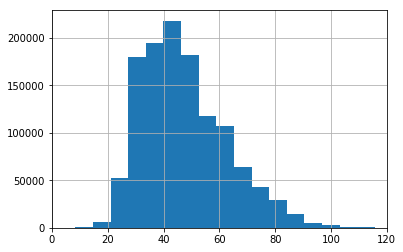

In [18]:
test_data.edad.hist(bins=1500)
plt.xlim(0,120)

(0, 160)

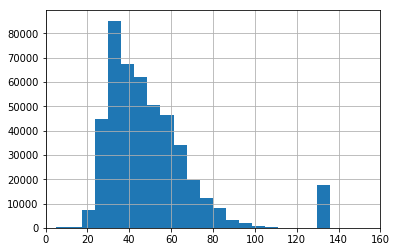

In [23]:
train.edad.hist(bins=1500)
plt.xlim(0,160)

In [16]:
train.head()

,target,id_cliente,calificacion,ex_pasivos,antiguedad_cliente,estado_civil,edad,segmento,ingreso_estimado,porc_var_ingreso,...,deuda_ssff,deuda_ssff_sh,carga_financiera,carga_financiera_ingreso,participacion_deuda,participacion_deuda_sh,genero,ciudad,departamento_principal,cant_autos
0,0,RSOHNVXOV000000,CN,0,52,SOLTERO,134,Personas,0.00,-100.000000,...,0.00,0.00,0.000000,0.00000,0.000000,0.000000,M,RENHR,EXXRV,0
1,0,RSXNGWVEE000000,CN,0,59,SOLTERO,41,Preferente,5140.80,15.922492,...,0.00,0.00,0.000000,0.00000,0.000000,0.000000,M,EENXX,GXOXSV,0
2,0,REHORGOGR000000,CN,0,95,CASADO,96,Preferente,2090.15,0.000000,...,0.00,0.00,0.000000,0.00000,0.000000,0.000000,M,GVOG,EXXRV,0
3,0,RSHWNXNOO000000,CN,0,78,SOLTERO,34,Preferente,87.55,-31.712999,...,8783.00,8783.00,424.099200,16.93829,0.000000,0.000000,F,ROWHE,GXOXSV,0
4,0,RXGNEHGGW000000,CPP,0,170,CASADO,67,Preferente,0.00,0.000000,...,207421.09,207421.09,7222.114704,0.00000,28.312859,28.312859,F,EGHHG,GXOXSV,1


In [3]:
encoded = pd.read_csv("base_train_mod.csv")

In [ ]:
encoded.ciudad

In [21]:
train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462738 entries, 0 to 462737
Data columns (total 77 columns):
target                                 462738 non-null int64
id_cliente                             462738 non-null object
calificacion                           462738 non-null object
ex_pasivos                             462738 non-null int64
antiguedad_cliente                     462738 non-null int64
estado_civil                           462738 non-null object
edad                                   462738 non-null int64
segmento                               462738 non-null object
ingreso_estimado                       462738 non-null float64
porc_var_ingreso                       462738 non-null float64
saldo_capta_promedio_ult               462738 non-null float64
saldo_capta_promedio_producto_a_ult    462738 non-null float64
saldo_capta_promedio_b_ult             462738 non-null float64
saldo_capta_promedio_c_ult             462738 non-null float64
saldo_capta_promedi

In [31]:
test_data.head()

,id_cliente,calificacion,ex_pasivos,antiguedad_cliente,estado_civil,edad,segmento,ingreso_estimado,porc_var_ingreso,saldo_capta_promedio_ult,...,deuda_ssff,deuda_ssff_sh,carga_financiera,carga_financiera_ingreso,participacion_deuda,participacion_deuda_sh,genero,ciudad,departamento_principal,cant_autos
0,RRXWEHOSS000000,CN,0,184,SOLTERO,46,Personas,0.000,0.000,0.0000,...,0.00,0.00,0.000000,0.000000,0.0,0.0,F,SHVVR,GXOXSV,0
1,RRXWESXVW000000,CN,0,137,SOLTERO,46,Personas,1232.925,-1.650,1.1015,...,1425.86,1425.86,54.734568,5.654514,0.0,0.0,M,SHVVR,GXOXSV,0
2,RRXWESNXG000000,CN,0,155,SOLTERO,46,Personas,1487.925,-1.375,0.0000,...,5151.00,5151.00,227.819760,14.648622,0.0,0.0,M,WOS,GXOXSV,3
3,RRXWEVXRG000000,CN,0,142,SOLTERO,46,Personas,0.000,0.000,0.0200,...,0.00,0.00,6.025040,0.000000,0.0,0.0,M,SHVVR,GXOXSV,2
4,RRXWEVSXE000000,CN,0,220,SOLTERO,48,Personas,0.000,-100.000,0.0000,...,0.00,0.00,0.000000,0.000000,0.0,0.0,M,RXWRON,GXOXSV,0


In [32]:
test_data.shape

(1269140, 76)

In [20]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import sys
import math 
from sklearn.externals import joblib
import os
import lightgbm as lgb
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
import functions_ml as fl
import importlib
importlib.reload(fl)
print("::::::::::::::::::::::::::::::::EXECUTING:::::::::::::::::::::::::::::::::::::::::::::")
train = pd.read_csv("data_train.txt", encoding="ISO-8859-1", delimiter="|")

print(train.head())

test  = pd.read_csv("data_test.txt", encoding="ISO-8859-1", delimiter ="|")

cols = ['target', 'id_cliente', 'calificacion', 'ex_pasivos',
       'antiguedad_cliente', 'estado_civil', 'edad', 'segmento',
       'ingreso_estimado', 'porc_var_ingreso', 'saldo_capta_promedio_ult',
       'saldo_capta_promedio_producto_a_ult', 'saldo_capta_promedio_b_ult',
       'saldo_capta_promedio_c_ult', 'saldo_capta_promedio_d_ult',
       'saldo_capta_promedio_otros_ult', 'saldo_coloca_promedio_ult',
       'saldo_coloca_promedio_e_ult', 'saldo_coloca_promedio_f_ult',
       'saldo_coloca_promedio_g_ult', 'antiguedad_hipoteca',
       'saldo_coloca_promedio_otros_ult', 'saldo_otros_promedio_ult',
       'saldo_ult', 'saldo_p_ult', 'saldo_ap_ult', 'var_saldo',
       'patron_saldos', 'var_deuda_ssff', 'patron_deuda_ssff',
       'tenencia_producto_b', 'tenencia_producto_c', 'tenencia_producto_a',
       'tenencia_producto_d', 'tenencia_producto_h', 'tenencia_producto_i',
       'tenencia_producto_e', 'tenencia_producto_g', 'tenencia_producto_j',
       'tenencia_producto_k', 'q_productos', 'por_deuda_CN',
       'Línea_de_TC_Utilizada', 'LineaTc', 'Línea_de_TC_Utilizada_Prom',
       'LineaTc_RCC_Prom', 'Porc_Linea_Utilizada_TC',
       'Porc_Linea_Utilizada_TC_p_ult', 'Porc_Linea_Utilizada_TC_ap_ult',
       'Var_Porc_Linea_Utilizada_TC', 'patron_Porc_Linea_Utilizada_TC',
       'nro_entidades_TC_Utilizada', 'var_Línea_de_TC_Utilizada_Prom',
       'patron_Línea_de_TC_Utilizada', 'nro_entidades_TC', 'ENTIDAD_PRINCIPAL',
       'ENTIDAD_DEUDA_PRINCIPAL', 'tipo_cliente', 'prom_dias_mora_TC',
       'var_prom_dias_mora_TC', 'patron_prom_dias_mora_TC', 'prest_personal',
       'prest_hipo', 'prest_total', 'prom_dias_mora_prest_total',
       'var_prom_dias_mora_prest_total', 'patron_prom_dias_mora_prest_total',
       'deuda_ssff', 'deuda_ssff_sh', 'carga_financiera',
       'carga_financiera_ingreso', 'participacion_deuda',
       'participacion_deuda_sh', 'genero', 'ciudad', 'departamento_principal',
       'cant_autos']

sub_cols = [  'calificacion', 'ex_pasivos',
       'antiguedad_cliente', 'estado_civil', 'edad', 'segmento',
       'ingreso_estimado', 'porc_var_ingreso', 'saldo_capta_promedio_ult',
       'tipo_cliente', 'prom_dias_mora_TC']
print("::::::::::::::::::::::::::::::::PREPROCESSING::::::::::::::::::::::::::::::::::::::::::")
X = train[sub_cols]
for c in X.columns[X.dtypes == 'object']:
    X[c] = X[c].factorize()[0]


X_test = test[sub_cols]
for c in X_test.columns[X_test.dtypes == 'object']:
    X_test[c] = X_test[c].factorize()[0]

print(X.head())
print(X_test.head())


y = train["target"]


lgb_algorithm = lgb.LGBMClassifier(n_estimators = 1000,max_depth =20,learning_rate =0.5 )


print("::::::::::::::::::::::::::::::::TRAINING:::::::::::::::::::::::::::::::::::::::::::::")


tabla_resultados=fl.experiment_model(lgb_algorithm, X, y, X_test,  name_algorithm ="", type_model = "lightgbm",
    dataset_version="default", parameters="default", type_problem ="classification", 
    type_validation="kfolds", cv_folds=10, save_model=False, name_model="model lighgbm", plot_fimportance=False)


sys.exit(0)

::::::::::::::::::::::::::::::::EXECUTING:::::::::::::::::::::::::::::::::::::::::::::
   target       id_cliente calificacion  ex_pasivos  antiguedad_cliente  \
0       0  RSOHNVXOV000000           CN           0                  52   
1       0  RSXNGWVEE000000           CN           0                  59   
2       0  REHORGOGR000000           CN           0                  95   
3       0  RSHWNXNOO000000           CN           0                  78   
4       0  RXGNEHGGW000000          CPP           0                 170   

  estado_civil  edad    segmento  ingreso_estimado  porc_var_ingreso  \
0      SOLTERO   134    Personas              0.00       -100.000000   
1      SOLTERO    41  Preferente           5140.80         15.922492   
2       CASADO    96  Preferente           2090.15          0.000000   
3      SOLTERO    34  Preferente             87.55        -31.712999   
4       CASADO    67  Preferente              0.00          0.000000   

      ...      deuda_ssff  de

c:\users\gideon\desktop\cursos\envs\pyenv\lib\site-packages\ipykernel_launcher.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\gideon\desktop\cursos\envs\pyenv\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


   calificacion  ex_pasivos  antiguedad_cliente  estado_civil  edad  segmento  \
0             0           0                  52             0   134         0   
1             0           0                  59             0    41         1   
2             0           0                  95             1    96         1   
3             0           0                  78             0    34         1   
4             1           0                 170             1    67         1   

   ingreso_estimado  porc_var_ingreso  saldo_capta_promedio_ult  tipo_cliente  \
0              0.00       -100.000000                    0.8359             0   
1           5140.80         15.922492                 3519.8086             0   
2           2090.15          0.000000                38050.1596             0   
3             87.55        -31.712999                   22.4076             1   
4              0.00          0.000000                    0.0000             2   

   prom_dias_mora_TC  
0  

c:\users\gideon\desktop\cursos\envs\pyenv\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


[1]	valid_0's auc: 0.803957	valid_0's binary_logloss: 0.0896164
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.771124	valid_0's binary_logloss: 0.0835813
[3]	valid_0's auc: 0.807868	valid_0's binary_logloss: 0.125021
[4]	valid_0's auc: 0.795666	valid_0's binary_logloss: 0.0955597
[5]	valid_0's auc: 0.8	valid_0's binary_logloss: 0.0952164
[6]	valid_0's auc: 0.802158	valid_0's binary_logloss: 0.0973842
[7]	valid_0's auc: 0.805118	valid_0's binary_logloss: 0.105666
[8]	valid_0's auc: 0.799706	valid_0's binary_logloss: 0.0982737
[9]	valid_0's auc: 0.802693	valid_0's binary_logloss: 0.106153
[10]	valid_0's auc: 0.802748	valid_0's binary_logloss: 0.101574
[11]	valid_0's auc: 0.802173	valid_0's binary_logloss: 0.103627
[12]	valid_0's auc: 0.799871	valid_0's binary_logloss: 0.104102
[13]	valid_0's auc: 0.79767	valid_0's binary_logloss: 0.104439
[14]	valid_0's auc: 0.794607	valid_0's binary_logloss: 0.105865
[15]	valid_0's auc: 0.792106	valid_0's binary_loglo

c:\users\gideon\desktop\cursos\envs\pyenv\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


[1]	valid_0's auc: 0.800013	valid_0's binary_logloss: 0.0898356
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.760071	valid_0's binary_logloss: 0.0766883
[3]	valid_0's auc: 0.802282	valid_0's binary_logloss: 0.106081
[4]	valid_0's auc: 0.794475	valid_0's binary_logloss: 0.112547
[5]	valid_0's auc: 0.785196	valid_0's binary_logloss: 0.0996911
[6]	valid_0's auc: 0.785615	valid_0's binary_logloss: 0.103309
[7]	valid_0's auc: 0.782496	valid_0's binary_logloss: 0.101092
[8]	valid_0's auc: 0.783769	valid_0's binary_logloss: 0.103098
[9]	valid_0's auc: 0.782469	valid_0's binary_logloss: 0.102954
[10]	valid_0's auc: 0.784748	valid_0's binary_logloss: 0.103073
[11]	valid_0's auc: 0.786176	valid_0's binary_logloss: 0.104972
[12]	valid_0's auc: 0.78208	valid_0's binary_logloss: 0.106525
[13]	valid_0's auc: 0.782745	valid_0's binary_logloss: 0.105693
[14]	valid_0's auc: 0.781192	valid_0's binary_logloss: 0.105619
[15]	valid_0's auc: 0.781605	valid_0's binary_log

c:\users\gideon\desktop\cursos\envs\pyenv\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


SystemExit: 0

c:\users\gideon\desktop\cursos\envs\pyenv\lib\site-packages\IPython\core\interactiveshell.py:3273: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [25]:
tabla_resultados

,accuracy_diff,accuracy_train,accuracy_train_std,accuracy_train_stdaccuracy_diffrecall_valid,accuracy_valid,accuracy_valid_std,algoritmo,dataset,logloss_diff,recall_diff,...,recall_train_std,recall_train_stdrecall_diff,recall_valid,recall_valid_std,recall_valid_stdrecall_train,time,train_logloss,train_logloss_std,valid_logloss,valid_logloss_std
0,-0.000013,0.985938,0.000000,NaN,0.985925,0.000000,,default,0.000443,-0.002863,...,0.000000,NaN,0.006199,0.000000,NaN,3.93,0.485685,0.000000,0.486128,0.000000
1,-0.000055,0.986074,0.000136,NaN,0.986019,0.000094,,default,0.001901,-0.003580,...,0.003577,NaN,0.009061,0.002861,NaN,7.38,0.480982,0.004703,0.482882,0.003245
2,-0.000096,0.986114,0.000125,NaN,0.986018,0.000077,,default,0.003322,-0.003577,...,0.003217,NaN,0.010016,0.002699,NaN,10.83,0.479600,0.004309,0.482921,0.002650


In [27]:
train = pd.read_csv("data_train.txt", encoding="ISO-8859-1", delimiter="|")
test  = pd.read_csv("data_test.txt", encoding="ISO-8859-1", delimiter ="|")

train["train"] = True
test["train"]  = False
test["target"] = 0
print(len(train.columns))

print(len(test.columns))
sys.exit(0)

78
78


SystemExit: 0

c:\users\gideon\desktop\cursos\envs\pyenv\lib\site-packages\IPython\core\interactiveshell.py:3273: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [10]:
sub.shape

(1269140, 2)

In [11]:
sub["id_cliente"]=sub.Id
sub["predictions_xgb_test"] = sub.Expecteds

In [12]:
sub.head()

,Id,Expected,id_cliente,predictions_xgb_test
0,RRXWEHOSS000000,0.002455,RRXWEHOSS000000,0.002455
1,RRXWESXVW000000,0.004021,RRXWESXVW000000,0.004021
2,RRXWESNXG000000,0.003132,RRXWESNXG000000,0.003132
3,RRXWEVXRG000000,0.003102,RRXWEVXRG000000,0.003102
4,RRXWEVSXE000000,0.002129,RRXWEVSXE000000,0.002129


In [13]:
[["id_cliente","predictions_xgb_test"]].to_csv("submission2.csv", index=False)